# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [124]:
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")

In [81]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [82]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [125]:
heroes_df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [126]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [85]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [86]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [87]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Blackwulf,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [88]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


**FRANCIS: CHECKING FOR COLUMNS WITH NA VALUES**

In [101]:
#Check for null values in heroes
heroes_df.columns[heroes_df.isna().any()]

Index(['Publisher', 'Weight'], dtype='object')

In [102]:
#Check for null values in powers
powers_df.columns[powers_df.isna().any()]

Index([], dtype='object')

**FRANCIS: INSPECTING UNIQUE VALUES**

In [103]:
for col in powers_df:
    print(powers_df[col].unique())

['3-D Man' 'A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas'
 'Absorbing Man' 'Adam Monroe' 'Adam Strange' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly' 'Alien'
 'Allan Quatermain' 'Amazo' 'Ammo' 'Ando Masahashi' 'Angel' 'Angel Dust'
 'Angel Salvadore' 'Angela' 'Animal Man' 'Annihilus' 'Ant-Man'
 'Ant-Man II' 'Anti-Monitor' 'Anti-Spawn' 'Anti-Venom' 'Apocalypse'
 'Aquababy' 'Aqualad' 'Aquaman' 'Arachne' 'Archangel' 'Arclight' 'Ardina'
 'Ares' 'Ariel' 'Armor' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II'
 'Atom III' 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bananaman'
 'Bane' 'Banshee' 'Bantam' 'Batgirl' 'Batgirl IV' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Ben 10'
 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdman' 'Bishop' 'Bizarro' 'Bizarro-Girl'
 'Black Abbott' 'Black 

In [151]:
for col in heroes_df:
    print(heroes_df[col].unique())

['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly'
 'Alfred Pennyworth' 'Alien' 'Allan Quatermain' 'Amazo' 'Ammo'
 'Ando Masahashi' 'Angel' 'Angel Dust' 'Angel Salvadore' 'Angela'
 'Animal Man' 'Annihilus' 'Ant-Man' 'Ant-Man II' 'Anti-Monitor'
 'Anti-Spawn' 'Anti-Venom' 'Apocalypse' 'Aquababy' 'Aqualad' 'Aquaman'
 'Arachne' 'Archangel' 'Arclight' 'Ardina' 'Ares' 'Ariel' 'Armor'
 'Arsenal' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II' 'Atom III'
 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bane' 'Banshee' 'Bantam'
 'Batgirl' 'Batgirl III' 'Batgirl IV' 'Batgirl V' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Beetle'
 'Ben 10' 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdman' 'B

**FRANCIS: CHECKING THE COLUMNS WITH PLACEHOLDER VALUES IN Powers_df**

In [143]:
#placeholder_col = powers_df.isin(['-']).sum(axis=0)
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True).head(9), '\n\n')

name 
 Spider-Man        0.004087
Goliath           0.004087
Firestorm         0.002725
Atlas             0.002725
Captain Marvel    0.002725
Atom              0.002725
Namor             0.002725
Angel             0.002725
Batman            0.002725
Name: name, dtype: float64 


Gender 
 Male       0.688011
Female     0.272480
Missing    0.039510
Name: Gender, dtype: float64 


Eye color 
 blue       0.306540
Missing    0.234332
brown      0.171662
green      0.099455
red        0.062670
black      0.031335
yellow     0.025886
white      0.023161
hazel      0.008174
Name: Eye color, dtype: float64 


Race 
 Missing              0.414169
Human                0.283379
Mutant               0.085831
God / Eternal        0.019074
Human / Radiation    0.014986
Cyborg               0.014986
Android              0.012262
Symbiote             0.012262
Alien                0.009537
Name: Race, dtype: float64 


Hair color 
 Missing    0.234332
Black      0.215259
Blond      0.134877
Brown      0

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:

**1)** Inspected both dataframes using: isnull(), .info(), .describe(), .unique(), value_counts().

**2)** Discovered the following: 
    
    Heroes_df: Has nulls in ['Publisher', 'Weight'], has some placeholder values "-" in certain columns and has "imposible" values in Height column (meaning they are acting as placeholders)
    
**3)** Strategy:
        
       Publisher NaN ----> switch the NaN values to 'Missing' to have a more descriptive way of recognizing the missing values. Since this is a categorical column describing publisher we dont want to wrongly assign the NaN to other publishers.
       
       Weight NaN----> we are only missing 2 entries, therefore we will assign the Median value to the missing rows
       
       
       Replace the placeholder for a more explicit term because the missing values represent less than 50% and the rest of the columns have perfectly good data so it is not worth dropping the missing value rows.
        Heroes_df['Gender']: replace place holder with "missing"
        Heroes_df['Eye color']: replace place holder with "missing"
        Heroes_df['Race']: replace place holder with "missing"
        Heroes_df['Hair color']: replace place holder with "missing"
        
       Heroes_df['Height']/['Weight] ----> Replace the placehoders with the median (placeholders shown as negative values). 30% of the data has placeholders and we dont want to lose those records.
       
       Heroes_df['Skin color'] ----->Drop the column becase the missing values represent more than 85% of the total sample
        
       Heroes_df['Alignment']----> Assign the missing rows the value of the Mode (the missing values are less than 1% and the mode represents more than 60% of the sample)
        
       
       ____________________________________________________________________________________________________________________________




In [144]:
heroes_df['Publisher'] = heroes_df['Publisher'].fillna('Missing')

In [145]:
heroes_df['Weight'] = heroes_df['Weight'].fillna(heroes_df['Weight'].median())

In [128]:
heroes_df['Gender'].replace(to_replace='-', value='Missing', inplace=True)

In [129]:
heroes_df['Eye color'].replace(to_replace='-', value='Missing', inplace=True)

In [130]:
heroes_df['Race'].replace(to_replace='-', value='Missing', inplace=True)

In [131]:
heroes_df['Hair color'].replace(to_replace='-', value='Missing', inplace=True)

In [176]:
heroes_df.loc[heroes_df['Height'] < 1] = heroes_df['Height'].median()

In [181]:
heroes_df.loc[heroes_df['Weight'] < 1] = heroes_df['Weight'].median()

In [132]:
heroes_df.drop('Skin color', axis=1, inplace=True)

In [139]:
heroes_df['Alignment'].replace(to_replace='-', value='good', inplace=True)

In [182]:
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts(normalize=True).head(4), '\n\n')

Gender 
 Male      0.457766
175.0     0.295640
Female    0.192098
99.0      0.034060
Name: Gender, dtype: float64 


Eye color 
 175.0    0.295640
blue     0.269755
brown    0.145777
green    0.084469
Name: Eye color, dtype: float64 


Race 
 175.0      0.295640
Missing    0.227520
Human      0.219346
Mutant     0.069482
Name: Race, dtype: float64 


Hair color 
 175.0    0.295640
Black    0.181199
Blond    0.113079
Brown    0.096730
Name: Hair color, dtype: float64 


Height 
 175.0    0.341962
183.0    0.073569
188.0    0.065395
180.0    0.051771
Name: Height, dtype: float64 


Publisher 
 Marvel Comics    0.433243
175.0            0.295640
DC Comics        0.194823
99.0             0.034060
Name: Publisher, dtype: float64 


Alignment 
 good     0.457766
175.0    0.295640
bad      0.189373
99.0     0.034060
Name: Alignment, dtype: float64 


Weight 
 175.0    0.295640
99.0     0.043597
54.0     0.031335
79.0     0.031335
Name: Weight, dtype: float64 




## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [147]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 9 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(7)
memory usage: 51.7+ KB


In [149]:
powers_df.keys()

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

In [152]:
heroes_df.set_index('name', inplace=True)

In [153]:
powers_df.set_index('hero_names', inplace=True)

In [337]:
heroes_df.join(powers_df, on='name', how='left')

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,175,175,175,175,175.0,175,175,175.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,175,175,175,175,175.0,175,175,175.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,Missing,Blond,173.0,Marvel Comics,good,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [184]:
male = heroes_df.loc[heroes_df['Gender'] == 'Male']

In [185]:
female = heroes_df.loc[heroes_df['Gender'] == 'Female']

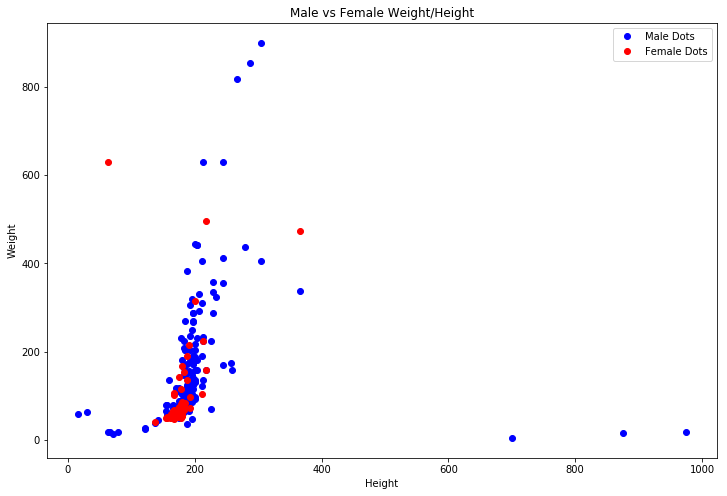

In [186]:
# fig, axes = plt.subplots(1,len(heroes_df['Height'].values)-1, sharey=True)
plt.figure(figsize=(12,8))

plt.plot(male['Height'], male['Weight'], 'bo', label='Male Dots')
plt.plot(female['Height'], female['Weight'], 'ro', label='Female Dots')
plt.title('Male vs Female Weight/Height')
plt.legend(loc='best')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [187]:
# male_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Male']
# female_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sliced_data = dataframe.loc[dataframe['Gender'] == gender][column_name]
    ax = sns.distplot(sliced_data)

In [188]:
male_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Female']

print('Male Weight -- Mean: {}, Median: {}, std: {}, var: {}'.format(male_heroes_df['Weight'].mean(), male_heroes_df['Weight'].median(), male_heroes_df['Weight'].std(), male_heroes_df['Weight'].var()))
print('Male Height -- Mean: {}, Median: {}, std: {}, var: {}'.format(male_heroes_df['Height'].mean(), male_heroes_df['Height'].median(), male_heroes_df['Height'].std(), male_heroes_df['Height'].var()))
print('Female Weight -- Mean: {}, Median: {}, std: {}, var: {}'.format(female_heroes_df['Weight'].mean(), female_heroes_df['Weight'].median(), female_heroes_df['Weight'].std(), female_heroes_df['Weight'].var()))
print('Female Height -- Mean: {}, Median: {}, std: {}, var: {}'.format(female_heroes_df['Height'].mean(), female_heroes_df['Height'].median(), female_heroes_df['Height'].std(), female_heroes_df['Height'].var()))

Male Weight -- Mean: 125.54464285714286, Median: 90.0, std: 111.02307586353574, var: 12326.123374200411
Male Height -- Mean: 192.4514880952381, Median: 185.0, std: 69.61030116031468, var: 4845.594027629707
Female Weight -- Mean: 78.34042553191489, Median: 58.0, std: 77.02076063237145, var: 5932.19756838906
Female Height -- Mean: 173.82624113475177, Median: 170.0, std: 21.581902621641362, var: 465.77852077001035


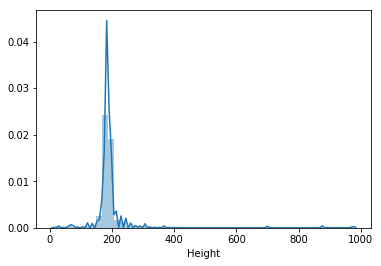

In [189]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')


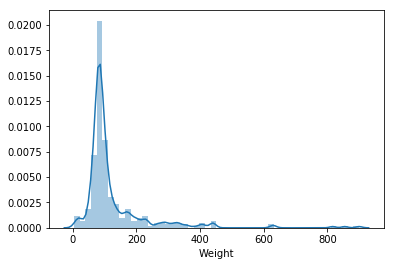

In [190]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

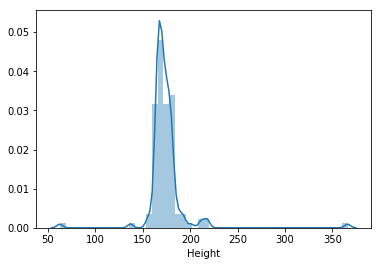

In [191]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')

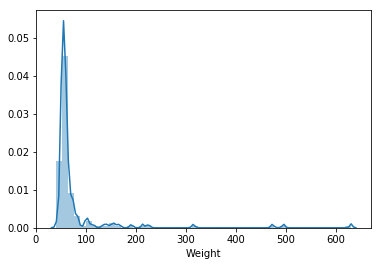

In [192]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:

     Thanks to the different plots and to calculating the central tendency measures of those variables, I was able to identify very big inconsistencies between the mean and median; also, the variance was a very high number...after analyzing the first set of graphs that I got I was able to visually identify that there were some negative heights and weights (impossible values) and went back to correct then in the data cleaning section above (assigned the median to any value < 0)
     
    After cleanning the data appropriately, both the histogram and the kernel density graph show expected behaviour backed up by the measures of central tendency calculated for each scenario.
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall? --> Super Strenght, Stamina, Durability, Super Speed, Agility
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [309]:
df = powers_df.copy()
for col in df.columns:
    df[col] = df[col].map({True: 1, False: 0})
    
power_totals = df.sum().sort_values(ascending=False)
power_totals.head(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

**Marvel top 5**

In [408]:
df2 = heroes_df.join(powers_df, on='name', how='left').copy()
df3 = df2[df2['Publisher'] == 'Marvel Comics'].copy()
col_to_drop = list(heroes_df.columns)
for col in col_to_drop:
     df3.drop(col, axis=1, inplace=True)

In [407]:
for col in df3.columns:
        df3[col] = df3[col].map({True: 1, False: 0})

In [409]:
power_totals_Marvel = df3.sum().sort_values(ascending=False)
power_totals_Marvel.head(5)

Super Strength    181.0
Stamina           143.0
Durability        140.0
Super Speed       123.0
Agility           118.0
dtype: float64

**DC Top 5**

In [419]:
df4 = df2[df2['Publisher'] == 'DC Comics'].copy()
col_to_drop = list(heroes_df.columns)
for col in col_to_drop:
     df4.drop(col, axis=1, inplace=True)
for col in df4.columns:
        df4[col] = df4[col].map({True: 1, False: 0})
power_totals_DC = df4.sum().sort_values(ascending=False)
power_totals_DC.head(5)

Super Strength    76.0
Stamina           67.0
Super Speed       61.0
Flight            60.0
Agility           58.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:

    The Marvel Universe powers compare to the overall sample trend (actually the Marvel Universe population  drives the overall trend because it is a bigger sample). DC universe has 3 powers in common with the Marvel Universe in its top 5 super powers.
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [ ]:
#Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?



## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data